In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
vehicle_id = 5
data_root = './'  # 改成自己电脑上的路径即可
dataset = pd.read_csv(data_root + 'perfect_%d.csv' % vehicle_id)
header = dataset.columns.values.tolist()
dataset.describe()

,vehicle_id,charge_start_time,charge_end_time,charge_duration,mileage,delta_mileage,charge_start_soc,charge_end_soc,charge_delta_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_energy
count,172.0,1.720000e+02,1.720000e+02,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000
mean,5.0,2.017711e+13,2.017711e+13,2716.110465,93807.004651,138.541860,44.552326,92.116279,47.563953,557.552326,579.100000,-126.587209,-91.47093,38.755814,27.238372,60.479291
std,0.0,4.423509e+09,4.423505e+09,1704.842636,18672.648535,87.348396,16.058834,10.631982,20.967016,6.242183,10.429726,65.818805,88.61253,5.087391,5.620153,25.706147
min,5.0,2.017110e+13,2.017110e+13,240.000000,65877.400000,34.100000,20.000000,41.000000,4.000000,543.300000,561.000000,-200.000000,-199.00000,28.000000,13.000000,2.041000
25%,5.0,2.017121e+13,2.017121e+13,1572.500000,77089.175000,94.175000,31.000000,85.000000,35.000000,552.800000,572.775000,-189.000000,-189.25000,35.000000,23.750000,45.124750
50%,5.0,2.018020e+13,2.018020e+13,2240.000000,90870.650000,143.850000,42.000000,98.000000,46.500000,558.150000,575.050000,-151.000000,-39.50000,38.000000,27.000000,60.896000
75%,5.0,2.018050e+13,2.018050e+13,3635.000000,111906.300000,146.700000,54.000000,100.000000,68.000000,561.500000,587.325000,-69.500000,-5.00000,43.000000,31.000000,84.717750
max,5.0,2.018071e+13,2.018071e+13,6980.000000,128177.500000,869.000000,96.000000,100.000000,79.000000,585.100000,604.800000,-3.000000,-1.00000,50.000000,41.000000,100.792000


/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


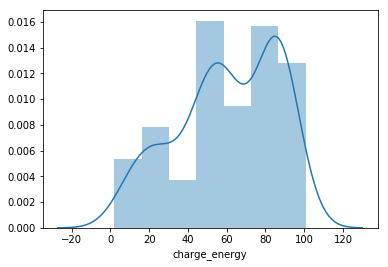

In [3]:
sns.distplot(dataset['charge_energy']);

### 特征选择

In [4]:
data_train = dataset.loc[range(int(0.75*len(dataset)))].copy()
data_test = dataset.loc[range(int(0.75*len(dataset)), len(dataset))].copy()
features = header[3:15]
label = header[15]
features, label, data_train.shape, data_test.shape

(['charge_duration',
  'mileage',
  'delta_mileage',
  'charge_start_soc',
  'charge_end_soc',
  'charge_delta_soc',
  'charge_start_U',
  'charge_end_U',
  'charge_start_I',
  'charge_end_I',
  'charge_max_temp',
  'charge_min_temp'],
 'charge_energy',
 (129, 16),
 (43, 16))

### 数据标准化

In [5]:
train_mean = data_train.mean()  
train_std = data_train.std()  
data_train_standard = (data_train - train_mean)/train_std #数据标准化
data_test_standard = (data_test - train_mean)/train_std
train_mean.to_csv("train_mean_%d.csv" % vehicle_id)
train_std.to_csv("train_std_%d.csv" % vehicle_id)
print(train_std, train_mean)

vehicle_id           0.000000e+00
charge_start_time    4.556897e+09
charge_end_time      4.556899e+09
charge_duration      1.636743e+03
mileage              1.349708e+04
delta_mileage        9.470696e+01
charge_start_soc     1.547653e+01
charge_end_soc       8.608476e+00
charge_delta_soc     2.009879e+01
charge_start_U       5.942917e+00
charge_end_U         1.038071e+01
charge_start_I       6.529144e+01
charge_end_I         8.992011e+01
charge_max_temp      3.789441e+00
charge_min_temp      4.254486e+00
charge_energy        2.468943e+01
dtype: float64 vehicle_id           5.000000e+00
charge_start_time    2.017596e+13
charge_end_time      2.017596e+13
charge_duration      2.621946e+03
mileage              8.553447e+04
delta_mileage        1.451248e+02
charge_start_soc     4.602326e+01
charge_end_soc       9.242636e+01
charge_delta_soc     4.640310e+01
charge_start_U       5.586899e+02
charge_end_U         5.818109e+02
charge_start_I      -1.290698e+02
charge_end_I        -9.351938e+01

### 将数据区分为训练集和测试集

In [6]:
X_train, y_train = data_train_standard[features].values, data_train_standard[label].values
X_test, y_test = data_test_standard[features].values, data_test_standard[label].values

### 建立一个简单BP神经网络模型

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import regularizers
model = Sequential()  #层次模型
model.add(Dense(200,input_dim=12,init='uniform'))
model.add(Activation('relu'))  #添加激活函数
model.add(Dense(1,input_dim=200))  #输出层

# 自定义loss函数
from keras import backend as K
def my_loss(y_true,y_pred):
    return K.sqrt(K.sum(K.square((y_pred - y_true) / y_true),axis = -1))
model.compile(loss='mean_squared_error', optimizer='sgd') #编译模型
model.fit(X_train, y_train, nb_epoch = 1000, batch_size = 20) #训练模型1000次

Using TensorFlow backend.
/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=12, kernel_initializer="uniform")`
  """
/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/1000
129/129 [==============================] - 0s 1ms/step - loss: 0.7260
Epoch 2/1000
129/129 [==============================] - 0s 80us/step - loss: 0.3816
Epoch 3/1000
129/129 [==============================] - 0s 96us/step - loss: 0.2136
Epoch 4/1000
129/129 [==============================] - 0s 154us/step - loss: 0.1305
Epoch 5/1000
129/129 [==============================] - 0s 108us/step - loss: 0.0883
Epoch 6/1000
129/129 [==============================] - 0s 132us/step - loss: 0.0660
Epoch 7/1000
129/129 [==============================] - 0s 117us/step - loss: 0.0528
Epoch 8/1000
129/129 [==============================] - 0s 107us/step - loss: 0.0433
Epoch 9/1000
129/129 [==============================] - 0s 106us/step - loss: 0.0370
Epoch 10/1000
129/129 [==============================] - 0s 117us/step - loss: 0.0314
Epoch 11/1000
129/129 [==============================] - 0s 91us/step - loss: 0.0275
Epoch 12/1000
129/129 [==============================] - 0s 83us/ste

129/129 [==============================] - 0s 73us/step - loss: 0.0023
Epoch 97/1000
129/129 [==============================] - 0s 82us/step - loss: 0.0023
Epoch 98/1000
129/129 [==============================] - 0s 108us/step - loss: 0.0023
Epoch 99/1000
129/129 [==============================] - 0s 93us/step - loss: 0.0023
Epoch 100/1000
129/129 [==============================] - 0s 87us/step - loss: 0.0023
Epoch 101/1000
129/129 [==============================] - 0s 85us/step - loss: 0.0023
Epoch 102/1000
129/129 [==============================] - 0s 87us/step - loss: 0.0022
Epoch 103/1000
129/129 [==============================] - 0s 92us/step - loss: 0.0022
Epoch 104/1000
129/129 [==============================] - 0s 87us/step - loss: 0.0022
Epoch 105/1000
129/129 [==============================] - 0s 109us/step - loss: 0.0022
Epoch 106/1000
129/129 [==============================] - 0s 105us/step - loss: 0.0022
Epoch 107/1000
129/129 [==============================] - 0s 138us/st

129/129 [==============================] - 0s 92us/step - loss: 0.0014
Epoch 191/1000
129/129 [==============================] - 0s 115us/step - loss: 0.0014
Epoch 192/1000
129/129 [==============================] - ETA: 0s - loss: 0.001 - 0s 72us/step - loss: 0.0014
Epoch 193/1000
129/129 [==============================] - 0s 88us/step - loss: 0.0014
Epoch 194/1000
129/129 [==============================] - 0s 76us/step - loss: 0.0014
Epoch 195/1000
129/129 [==============================] - 0s 126us/step - loss: 0.0014
Epoch 196/1000
129/129 [==============================] - 0s 113us/step - loss: 0.0014
Epoch 197/1000
129/129 [==============================] - 0s 115us/step - loss: 0.0014
Epoch 198/1000
129/129 [==============================] - 0s 83us/step - loss: 0.0014
Epoch 199/1000
129/129 [==============================] - 0s 113us/step - loss: 0.0014
Epoch 200/1000
129/129 [==============================] - 0s 107us/step - loss: 0.0014
Epoch 201/1000
129/129 [===============

129/129 [==============================] - 0s 80us/step - loss: 0.0011
Epoch 285/1000
129/129 [==============================] - 0s 111us/step - loss: 0.0011
Epoch 286/1000
129/129 [==============================] - 0s 76us/step - loss: 0.0011
Epoch 287/1000
129/129 [==============================] - 0s 101us/step - loss: 0.0011
Epoch 288/1000
129/129 [==============================] - 0s 123us/step - loss: 0.0011
Epoch 289/1000
129/129 [==============================] - 0s 127us/step - loss: 0.0011
Epoch 290/1000
129/129 [==============================] - 0s 119us/step - loss: 0.0011
Epoch 291/1000
129/129 [==============================] - 0s 112us/step - loss: 0.0011
Epoch 292/1000
129/129 [==============================] - 0s 122us/step - loss: 0.0011
Epoch 293/1000
129/129 [==============================] - 0s 114us/step - loss: 0.0011
Epoch 294/1000
129/129 [==============================] - 0s 114us/step - loss: 0.0011
Epoch 295/1000
129/129 [==============================] - 0s

129/129 [==============================] - 0s 85us/step - loss: 9.0012e-04
Epoch 377/1000
129/129 [==============================] - 0s 90us/step - loss: 8.9880e-04
Epoch 378/1000
129/129 [==============================] - 0s 95us/step - loss: 8.9854e-04
Epoch 379/1000
129/129 [==============================] - 0s 173us/step - loss: 8.9119e-04
Epoch 380/1000
129/129 [==============================] - 0s 89us/step - loss: 8.9363e-04
Epoch 381/1000
129/129 [==============================] - 0s 92us/step - loss: 8.9163e-04
Epoch 382/1000
129/129 [==============================] - 0s 122us/step - loss: 8.9654e-04
Epoch 383/1000
129/129 [==============================] - 0s 124us/step - loss: 8.9090e-04
Epoch 384/1000
129/129 [==============================] - 0s 116us/step - loss: 8.8325e-04
Epoch 385/1000
129/129 [==============================] - 0s 102us/step - loss: 8.8016e-04
Epoch 386/1000
129/129 [==============================] - 0s 105us/step - loss: 8.8606e-04
Epoch 387/1000
129/

129/129 [==============================] - 0s 105us/step - loss: 7.7182e-04
Epoch 467/1000
129/129 [==============================] - 0s 82us/step - loss: 7.7858e-04
Epoch 468/1000
129/129 [==============================] - 0s 88us/step - loss: 7.7045e-04
Epoch 469/1000
129/129 [==============================] - 0s 99us/step - loss: 7.6850e-04
Epoch 470/1000
129/129 [==============================] - 0s 124us/step - loss: 7.6782e-04
Epoch 471/1000
129/129 [==============================] - 0s 110us/step - loss: 7.6423e-04
Epoch 472/1000
129/129 [==============================] - 0s 106us/step - loss: 7.6185e-04
Epoch 473/1000
129/129 [==============================] - 0s 123us/step - loss: 7.6403e-04
Epoch 474/1000
129/129 [==============================] - 0s 117us/step - loss: 7.5992e-04
Epoch 475/1000
129/129 [==============================] - 0s 126us/step - loss: 7.6198e-04
Epoch 476/1000
129/129 [==============================] - 0s 110us/step - loss: 7.6273e-04
Epoch 477/1000
12

129/129 [==============================] - 0s 73us/step - loss: 6.7633e-04
Epoch 557/1000
129/129 [==============================] - 0s 77us/step - loss: 6.7455e-04
Epoch 558/1000
129/129 [==============================] - 0s 100us/step - loss: 6.7277e-04
Epoch 559/1000
129/129 [==============================] - 0s 67us/step - loss: 6.7591e-04
Epoch 560/1000
129/129 [==============================] - 0s 74us/step - loss: 6.6874e-04
Epoch 561/1000
129/129 [==============================] - 0s 73us/step - loss: 6.7197e-04
Epoch 562/1000
129/129 [==============================] - 0s 126us/step - loss: 6.7403e-04
Epoch 563/1000
129/129 [==============================] - 0s 138us/step - loss: 6.6847e-04
Epoch 564/1000
129/129 [==============================] - 0s 118us/step - loss: 6.7055e-04
Epoch 565/1000
129/129 [==============================] - 0s 126us/step - loss: 6.6952e-04
Epoch 566/1000
129/129 [==============================] - 0s 121us/step - loss: 6.7122e-04
Epoch 567/1000
129/

129/129 [==============================] - 0s 73us/step - loss: 6.0449e-04
Epoch 646/1000
129/129 [==============================] - ETA: 0s - loss: 3.2872e-0 - 0s 77us/step - loss: 6.0259e-04
Epoch 647/1000
129/129 [==============================] - 0s 88us/step - loss: 6.0309e-04
Epoch 648/1000
129/129 [==============================] - 0s 84us/step - loss: 5.9989e-04
Epoch 649/1000
129/129 [==============================] - 0s 77us/step - loss: 6.0169e-04
Epoch 650/1000
129/129 [==============================] - 0s 106us/step - loss: 5.9923e-04
Epoch 651/1000
129/129 [==============================] - 0s 147us/step - loss: 6.0164e-04
Epoch 652/1000
129/129 [==============================] - 0s 136us/step - loss: 6.0245e-04
Epoch 653/1000
129/129 [==============================] - 0s 135us/step - loss: 5.9787e-04
Epoch 654/1000
129/129 [==============================] - 0s 91us/step - loss: 5.9756e-04
Epoch 655/1000
129/129 [==============================] - 0s 106us/step - loss: 5.9

129/129 [==============================] - 0s 76us/step - loss: 5.4784e-04
Epoch 735/1000
129/129 [==============================] - 0s 120us/step - loss: 5.4613e-04
Epoch 736/1000
129/129 [==============================] - 0s 84us/step - loss: 5.4488e-04
Epoch 737/1000
129/129 [==============================] - 0s 85us/step - loss: 5.4828e-04
Epoch 738/1000
129/129 [==============================] - 0s 110us/step - loss: 5.4597e-04
Epoch 739/1000
129/129 [==============================] - 0s 105us/step - loss: 5.4400e-04
Epoch 740/1000
129/129 [==============================] - 0s 87us/step - loss: 5.4427e-04
Epoch 741/1000
129/129 [==============================] - 0s 129us/step - loss: 5.4378e-04
Epoch 742/1000
129/129 [==============================] - 0s 133us/step - loss: 5.4310e-04
Epoch 743/1000
129/129 [==============================] - 0s 111us/step - loss: 5.4219e-04
Epoch 744/1000
129/129 [==============================] - 0s 114us/step - loss: 5.4243e-04
Epoch 745/1000
129

129/129 [==============================] - 0s 80us/step - loss: 4.9915e-04
Epoch 825/1000
129/129 [==============================] - 0s 109us/step - loss: 5.0185e-04
Epoch 826/1000
129/129 [==============================] - 0s 82us/step - loss: 4.9803e-04
Epoch 827/1000
129/129 [==============================] - 0s 74us/step - loss: 5.0025e-04
Epoch 828/1000
129/129 [==============================] - 0s 82us/step - loss: 4.9764e-04
Epoch 829/1000
129/129 [==============================] - 0s 110us/step - loss: 4.9628e-04
Epoch 830/1000
129/129 [==============================] - 0s 108us/step - loss: 4.9733e-04
Epoch 831/1000
129/129 [==============================] - 0s 105us/step - loss: 4.9723e-04
Epoch 832/1000
129/129 [==============================] - 0s 112us/step - loss: 4.9878e-04
Epoch 833/1000
129/129 [==============================] - 0s 99us/step - loss: 4.9517e-04
Epoch 834/1000
129/129 [==============================] - 0s 110us/step - loss: 4.9774e-04
Epoch 835/1000
129/

129/129 [==============================] - 0s 95us/step - loss: 4.6153e-04
Epoch 915/1000
129/129 [==============================] - 0s 84us/step - loss: 4.6088e-04
Epoch 916/1000
129/129 [==============================] - 0s 123us/step - loss: 4.5981e-04
Epoch 917/1000
129/129 [==============================] - 0s 95us/step - loss: 4.6112e-04
Epoch 918/1000
129/129 [==============================] - 0s 106us/step - loss: 4.5968e-04
Epoch 919/1000
129/129 [==============================] - 0s 139us/step - loss: 4.5868e-04
Epoch 920/1000
129/129 [==============================] - 0s 97us/step - loss: 4.5850e-04
Epoch 921/1000
129/129 [==============================] - 0s 98us/step - loss: 4.5930e-04
Epoch 922/1000
129/129 [==============================] - 0s 105us/step - loss: 4.5827e-04
Epoch 923/1000
129/129 [==============================] - 0s 115us/step - loss: 4.5823e-04
Epoch 924/1000
129/129 [==============================] - 0s 117us/step - loss: 4.5726e-04
Epoch 925/1000
129/

### 保存模型权重

In [8]:
modelfile = '../model/modelweight_%d.model' % vehicle_id #神经网络权重保存
model.save_weights(modelfile) 
model.save('../model/%d.h5' % vehicle_id)

### 在验证集上进行验证（预测），并评估模型

In [9]:
res = model.predict(X_test) * train_std['charge_energy'] + train_mean['charge_energy']
y_test = y_test * train_std['charge_energy'] + train_mean['charge_energy']
y_pred = []
for i in range(len(res)):
    y_pred.append(res[i][0])

In [10]:
#评估模型
from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# 用scikit-learn计算MAE
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))

error_array = np.array(((y_test - y_pred) / y_test))
error_rate = np.sqrt(np.sum(np.power(error_array,2)))
print("error_rate: %f" % error_rate)

MSE: 4.84019462389
RMSE: 2.20004423226
MAE: 1.68639681829
error_rate: 0.427612


### 真实值与预测值越接近y=x表明预测越准确

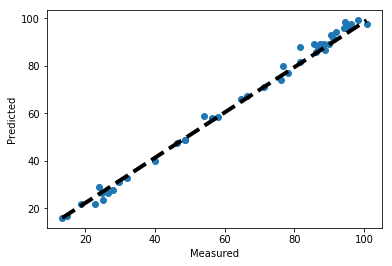

In [11]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([np.array(y_test).min(), np.array(y_test).max()], [np.array(y_pred).min(), np.array(y_pred).max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [12]:
data_test['charge_energy_pred'] = y_pred
data_test

,vehicle_id,charge_start_time,charge_end_time,charge_duration,mileage,delta_mileage,charge_start_soc,charge_end_soc,charge_delta_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_energy,charge_energy_pred
129,5,20180505134454,20180505141634,1900,112014.3,144.0,41.0,86.0,45.0,555.1,573.5,-96.0,-191.0,40.0,29.0,57.942,58.432766
130,5,20180505220744,20180505234604,5900,112155.5,141.2,25.0,100.0,75.0,547.8,566.6,-63.0,-5.0,43.0,32.0,91.850,94.101440
131,5,20180507113603,20180507114333,450,112425.1,91.2,53.0,63.0,10.0,558.1,567.0,-189.0,-189.0,39.0,32.0,13.340,15.956211
132,5,20180507140233,20180507143933,2220,112478.8,53.7,38.0,90.0,52.0,556.5,573.4,-189.0,-189.0,46.0,34.0,66.309,67.223297
133,5,20180507220424,20180507233544,5480,112620.1,141.3,23.0,100.0,77.0,544.7,565.2,-36.0,-1.0,45.0,31.0,96.378,97.556305
134,5,20180509010158,20180509014548,2630,112906.9,141.5,37.0,98.0,61.0,564.6,570.1,-199.0,-40.0,42.0,27.0,78.097,77.206757
135,5,20180509230200,20180509235430,3150,113061.6,154.7,41.0,100.0,59.0,559.8,569.2,-150.0,-4.0,38.0,25.0,76.151,74.184250
136,5,20180510132647,20180510135817,1890,113206.0,144.4,42.0,86.0,44.0,556.6,573.9,-189.0,-188.0,39.0,26.0,56.378,58.011292
137,5,20180510225948,20180510235318,3210,113347.8,141.8,30.0,100.0,70.0,556.8,566.6,-181.0,-1.0,43.0,27.0,86.763,88.245560
138,5,20180513011047,20180513021927,4120,113830.1,142.6,21.0,100.0,79.0,546.6,566.8,-97.0,-1.0,46.0,32.0,98.408,99.238037
